# Linking Writing Processes to Writing Quality

By: David Hartsman

<hr style="border: 4px solid black">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Data Dictionary/Reference: (Copied from Kaggle - https://www.kaggle.com/competitions/linking-writing-processes-to-writing-quality/data)
File and Field Information
`train_logs.csv` - Input logs to be used as training data. To prevent reproduction of the essay text, all alphanumeric character inputs have been replaced with the "anonymous" character q; punctuation and other special characters have not been anonymized.

- id - The unique ID of the essay
- event_id - The index of the event, ordered chronologically
- down_time - The time of the down event in milliseconds
- up_time - The time of the up event in milliseconds
- action_time - The duration of the event (the difference between down_time and up_time)
- activity - The category of activity which the event belongs to
- Nonproduction - The event does not alter the text in any way
- Input - The event adds text to the essay
- Remove/Cut - The event removes text from the essay
- Paste - The event changes the text through a paste input
- Replace - The event replaces a section of text with another string
- Move From [x1, y1] To [x2, y2] - The event moves a section of text spanning character index x1, y1 to a new location x2, y2
- down_event - The name of the event when the key/mouse is pressed
- up_event - The name of the event when the key/mouse is released
- text_change - The text that changed as a result of the event (if any)
- cursor_position - The character index of the text cursor after the event
- word_count - The word count of the essay after the event
### Additional Features referenced in the Kaggle Desc
1. Production Rate
        - The rate of written language production can be measured by counting the number of characters, words, clauses, sentences, or T-units in the writing process or written product generated per unit of time. Example measures are as follows.


        a. number of characters (including spaces) produced per minute during the process
        b. number of characters (including spaces) produced per minute in the product

2. Pause
        - Pause: Pauses are generally defined as inter-keystroke intervals (IKI) above a certain threshold (e.g., 2000 milliseconds). The IKI refers to the gap time between two consecutive key presses typically expressed in milliseconds. To illustrate, suppose a writer types a character "A" at time 1 and then a character "B" at time 2. One can obtain the IKI between the two characters simply using the formula: IKI = Time2 - Time1. Global measures of pausing are usually associated with the duration and frequency of pauses calculated from different dimensions. Below are some typical pause measures.
        
        a. number of pauses (in total or per minute) 
        b. proportion of pause time (as a % of total writing time)
        c. pause length (usually the mean duration of all pauses in text production)
        d. pause lengths or frequencies within words, between words, between sentences, between paragraphs, etc.
        
3. Revision: Revisions are operations of deletions or insertions in writing. A deletion is defined as the removal of any stretch of characters from a text whereas an insertion refers to a sequence of activities to add characters to a growing text (except the end). Below are some commonly used revision measures:

        a. number of deletions (in total or per minute)
        b. number of insertions (in total or per minute)
        c. length of deletions (in characters)
        d. length of insertions (in characters)
        e. proportion of deletions (as a % of total writing time)
        f. proportion of insertions (as a % of total writing time)
        g. product vs. process ratio (The number of characters in the product divided by the number of characters produced during the writing process)
        h. number/length of revisions at the point of inscription (i.e., at the current end of a text being produced)
        i. number/length of revisions after the text has been transcribed (i.e., at a previous point in the text)
        j. number of immediate revisions (the distance between the position of the flashing cursor and the revision point equal to zero)
        k. number of distant revisions (the distance between the position of the flashing cursor and the revision point larger than zero)
        
        
4. Process Variance: Process variance attends to the dynamics of the writing process in relation to time and thus represents how the writer's fluency may differ at different stages.

        Process variance is generally measured by first dividing the whole writing process into a certain number of equal time intervals (e.g., 5 or 10) and then calculating the total number of characters produced in the intervals (often normalized to the average number of characters per minute), or to make it more comparable among writers, the proportion of characters produced per interval. 
        
        The standard deviation of characters produced per interval is also calculated from keystroke logs as an indicator of process variance.


Note that there may be events in the test set that do not occur in the training set. Your solution should be robust to unseen events.

Note: Key_down and key_up events may not necessarily occur in the same order as they are presented in the dataset. To illustrate, a writer may press down "a" and then press down "b" before he/she even releases "a". However, all the keystroke information about "a" comes before "b" in the dataframe.

`test_logs.csv` - Input logs to be used as test data. Contains the same fields as train_logs.csv. The logs available in the public version of this file are only examples to illustrate the format.


`train_scores.csv`
id - The unique ID of the essay
score - The score the essay received out of 6 (the prediction target for the competition)
sample_submission.csv - A submission file in the correct format. See the Evaluation page for details.

#### Data loading

In [2]:
df = pd.read_csv('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/writing_quality/linking-writing-processes-to-writing-quality/train_logs.csv')

In [3]:
df.head()

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405898 entries, 0 to 8405897
Data columns (total 11 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   id               object
 1   event_id         int64 
 2   down_time        int64 
 3   up_time          int64 
 4   action_time      int64 
 5   activity         object
 6   down_event       object
 7   up_event         object
 8   text_change      object
 9   cursor_position  int64 
 10  word_count       int64 
dtypes: int64(6), object(5)
memory usage: 705.5+ MB


In [5]:
df.shape

(8405898, 11)

In [6]:
# whoopie! 

df.isna().sum()

id                 0
event_id           0
down_time          0
up_time            0
action_time        0
activity           0
down_event         0
up_event           0
text_change        0
cursor_position    0
word_count         0
dtype: int64

<hr style="border: 4px solid blue">

### Grouping by ID and aggregating statistics will be required in order to create a consolidated dataframe that can be used in supervised learning and machine learning algorithms.

In [7]:
df["id"].duplicated().sum()

8403427

In [8]:
# corresponds to the number of labels we have for the data, so a lot of data needs to be aggregated

df.shape[0] - df["id"].duplicated().sum()

2471

<hr style="border: 4px solid blue">

#### Labels: These labels will have to be joined with the final training feature data on the id column

In [9]:
grades = pd.read_csv('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/writing_quality/linking-writing-processes-to-writing-quality/train_scores.csv')

In [10]:
grades

,id,score
0,001519c8,3.5
1,0022f953,3.5
2,0042269b,6.0
3,0059420b,2.0
4,0075873a,4.0
...,...,...
2466,ffb8c745,3.5
2467,ffbef7e5,4.0
2468,ffccd6fd,1.5
2469,ffec5b38,5.0


<hr style="border: 4px solid blue">

### Distribution Visualizations
##### Four different methods of displaying the distribution of scores in our data set. I would describe this data as adhering to a normal distribution. Of all the options, I think that the histplot with 12 bins corresponding to the 12 different discrete score values registers the strongest in terms of representing a distribution whereas the bar plot and count plot each have a bit more visual appeal, but their gaps between bars weakens the immediate visual recognition of the plot representing score distributions. 

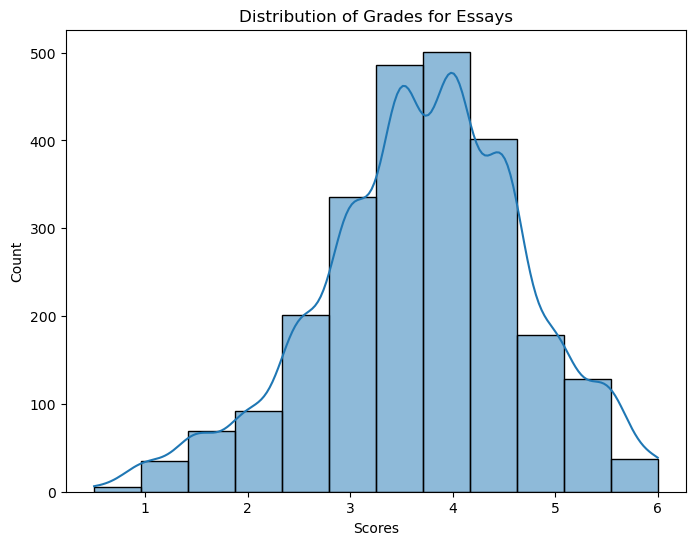

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=grades, x='score', ax=ax, kde=True, bins=12)
ax.set_title("Distribution of Grades for Essays")
ax.set_xlabel("Scores");

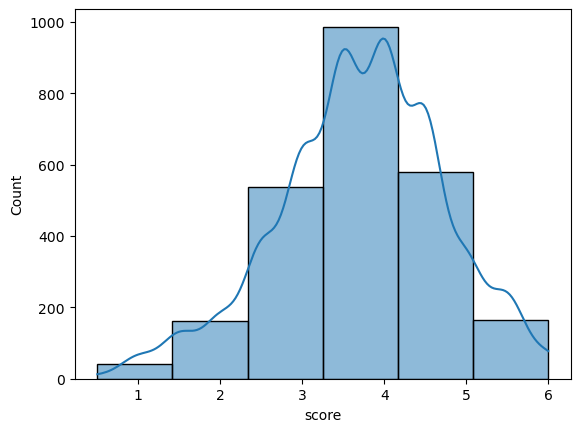

In [12]:
# Create a custom color palette
custom_palette = sns.color_palette("husl", 8)

# Plot histogram with the custom palette
sns.histplot(data=grades, x='score', kde=True, bins=6, cbar='viridis')

# Show the plot
plt.show()

### Assigning the value_counts to a new variable for different styles of plots

In [13]:
grades['score'].value_counts().sort_index()

score
0.5      5
1.0     35
1.5     69
2.0     92
2.5    201
3.0    336
3.5    486
4.0    501
4.5    402
5.0    179
5.5    128
6.0     37
Name: count, dtype: int64

In [14]:
grade_counts = grades['score'].value_counts().sort_index().reset_index()

In [15]:
grade_counts

,score,count
0,0.5,5
1,1.0,35
2,1.5,69
3,2.0,92
4,2.5,201
5,3.0,336
6,3.5,486
7,4.0,501
8,4.5,402
9,5.0,179


In [16]:
# Visually displays the innerquartile range of the distribution in the barplot color palette

cust_col = ['blue' if grades['score'].quantile(.25) <= score <= grades['score'].quantile(.75) \
            else 'lightgray' for score in grade_counts['score']]

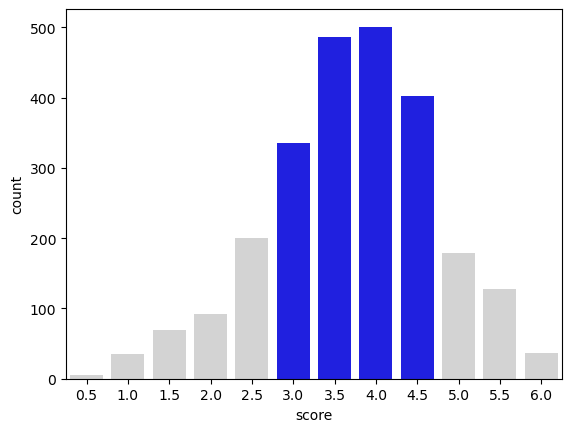

In [17]:
# Barplot of the distribution with color differences

sns.barplot(data=grade_counts, x='score', y='count', palette=cust_col);

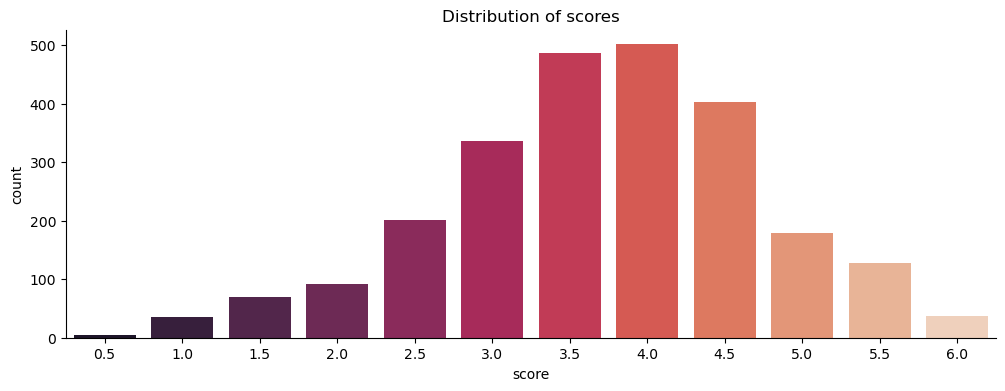

In [18]:
# Probably the easiest version to code with enhanced aesthetics, similar end-product as the bar plot, but doesn't
# require the specific coding of a value_counts() dataframe

fig, ax = plt.subplots(figsize=(12, 4))

# purely aesthetic -> removes right hand spine of the chart, leaving a borderless white space
sns.despine()

# countplot shows the counts of occurences within a categorical feature, so given that these scores are discrete and
# not continuous, the countplot might be preferable to the histplot, however as shown above, i tidied it up by 
# tailoring the number of bins to = 12, the same number of discrete score values
ax = sns.countplot(data=grades,
                   x="score", palette='rocket')

ax.set_title("Distribution of scores");

### Begin Group-By transformations
'id' will be the value we 'groupby' to create a new data frame

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405898 entries, 0 to 8405897
Data columns (total 11 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   id               object
 1   event_id         int64 
 2   down_time        int64 
 3   up_time          int64 
 4   action_time      int64 
 5   activity         object
 6   down_event       object
 7   up_event         object
 8   text_change      object
 9   cursor_position  int64 
 10  word_count       int64 
dtypes: int64(6), object(5)
memory usage: 705.5+ MB


In [20]:
df.columns

Index(['id', 'event_id', 'down_time', 'up_time', 'action_time', 'activity',
       'down_event', 'up_event', 'text_change', 'cursor_position',
       'word_count'],
      dtype='object')

### Data Dictionary/Reference: (Copied from Kaggle - https://www.kaggle.com/competitions/linking-writing-processes-to-writing-quality/data)
File and Field Information
`train_logs.csv` - Input logs to be used as training data. To prevent reproduction of the essay text, all alphanumeric character inputs have been replaced with the "anonymous" character q; punctuation and other special characters have not been anonymized.

- id - The unique ID of the essay
- event_id - The index of the event, ordered chronologically
- down_time - The time of the down event in milliseconds
- up_time - The time of the up event in milliseconds
- action_time - The duration of the event (the difference between down_time and up_time)
- activity - The category of activity which the event belongs to
    - Nonproduction - The event does not alter the text in any way
    - Input - The event adds text to the essay
    - Remove/Cut - The event removes text from the essay
    - Paste - The event changes the text through a paste input
    - Replace - The event replaces a section of text with another string
    - Move From [x1, y1] To [x2, y2] - The event moves a section of text spanning character index x1, y1 to a new location x2, y2
- down_event - The name of the event when the key/mouse is pressed
- up_event - The name of the event when the key/mouse is released
- text_change - The text that changed as a result of the event (if any)
- cursor_position - The character index of the text cursor after the event
- word_count - The word count of the essay after the event
### Additional Features referenced in the Kaggle Desc
1. Production Rate
        - The rate of written language production can be measured by counting the number of characters, words, clauses, sentences, or T-units in the writing process or written product generated per unit of time. Example measures are as follows.


        a. number of characters (including spaces) produced per minute during the process
        b. number of characters (including spaces) produced per minute in the product

2. Pause
        - Pause: Pauses are generally defined as inter-keystroke intervals (IKI) above a certain threshold (e.g., 2000 milliseconds). The IKI refers to the gap time between two consecutive key presses typically expressed in milliseconds. To illustrate, suppose a writer types a character "A" at time 1 and then a character "B" at time 2. One can obtain the IKI between the two characters simply using the formula: IKI = Time2 - Time1. Global measures of pausing are usually associated with the duration and frequency of pauses calculated from different dimensions. Below are some typical pause measures.
        
        a. number of pauses (in total or per minute) 
        b. proportion of pause time (as a % of total writing time)
        c. pause length (usually the mean duration of all pauses in text production)
        d. pause lengths or frequencies within words, between words, between sentences, between paragraphs, etc.
        
3. Revision: Revisions are operations of deletions or insertions in writing. A deletion is defined as the removal of any stretch of characters from a text whereas an insertion refers to a sequence of activities to add characters to a growing text (except the end). Below are some commonly used revision measures:

        a. number of deletions (in total or per minute)
        b. number of insertions (in total or per minute)
        c. length of deletions (in characters)
        d. length of insertions (in characters)
        e. proportion of deletions (as a % of total writing time)
        f. proportion of insertions (as a % of total writing time)
        g. product vs. process ratio (The number of characters in the product divided by the number of characters produced during the writing process)
        h. number/length of revisions at the point of inscription (i.e., at the current end of a text being produced)
        i. number/length of revisions after the text has been transcribed (i.e., at a previous point in the text)
        j. number of immediate revisions (the distance between the position of the flashing cursor and the revision point equal to zero)
        k. number of distant revisions (the distance between the position of the flashing cursor and the revision point larger than zero)
        
        
4. Process Variance: Process variance attends to the dynamics of the writing process in relation to time and thus represents how the writer's fluency may differ at different stages.

        Process variance is generally measured by first dividing the whole writing process into a certain number of equal time intervals (e.g., 5 or 10) and then calculating the total number of characters produced in the intervals (often normalized to the average number of characters per minute), or to make it more comparable among writers, the proportion of characters produced per interval. 
        
        The standard deviation of characters produced per interval is also calculated from keystroke logs as an indicator of process variance.


Note that there may be events in the test set that do not occur in the training set. Your solution should be robust to unseen events.

Note: Key_down and key_up events may not necessarily occur in the same order as they are presented in the dataset. To illustrate, a writer may press down "a" and then press down "b" before he/she even releases "a". However, all the keystroke information about "a" comes before "b" in the dataframe.

`test_logs.csv` - Input logs to be used as test data. Contains the same fields as train_logs.csv. The logs available in the public version of this file are only examples to illustrate the format.


`train_scores.csv`
id - The unique ID of the essay
score - The score the essay received out of 6 (the prediction target for the competition)
sample_submission.csv - A submission file in the correct format. See the Evaluation page for details.

### Text Change

In [21]:
# 96 unique character types.... seems like a lot, but perhaps it is still worthwhile

df.loc[df['text_change'].str.contains('q') == False, "text_change"].unique()

array(['NoChange', ' ', '.', ',', '\n', "'", ';', '-', '?', '"', '\n ',
       '=', '/', ':', '[', '$', '(', ')', '+', '\\', '*', '&', '!', '%',
       '>', ', ', ', => .', ', => ;', '. ', '\n\n\n\n\n\n\n\n\n\n\n\n',
       '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n', '\n\n\n\n', '<', '.... => .',
       ']', '\n => .', '@', '\x96', '".', '"\n', '  => -', ', =>  ',
       '            ', '{', '  => ,', '- ', '. => ,', '\x94', '\x93', '¿',
       '}', '. =>  ', '  => \n', '^', '`', '\x9b', ',  => .', '...', '#',
       '~', '\n\n', '_', '.  =>  ', ',  =>  ', '? ', ' - => ,', '!  =>  ',
       'Ä±', '. => ?', '\n =>  ', '|', 'â\x80\x93', '\x97',
       '                                                                         ',
       '                                                                                                                                                                                                                                                                         

In [22]:
period_check = df['text_change'].str.contains(r"\.\s*$").astype(int)
pc = pd.concat([period_check, df['id']], axis=1)
period_replacement = pc.groupby('id')["text_change"].sum()

In [29]:
df["text_change"].unique()

array(['NoChange', 'q', ' ', ..., 'qq qqq qqqq qqqqq',
       'qq qqqqq qqqq qq qqqqq ',
       '\n qqqqq qqqqqq qqqqqqqqqq qq q qqqqqqqq qqq qqq qqqq qqqqqq q qqq. \n\nqqqq qqq qq qqqqqqq qqq:\n- \n- qqq qqqqqqq qqqq q qqqqqq qqqqqqqq qq qqqq qqqqqqqq '],
      dtype=object)

In [27]:
period_replacement

id
001519c8    28
0022f953    18
0042269b    23
0059420b    13
0075873a    32
            ..
ffb8c745    59
ffbef7e5    33
ffccd6fd     6
ffec5b38    35
fff05981    19
Name: text_change, Length: 2471, dtype: int64

In [25]:
# TEXT CHANGE COLUMN

# Need to extract:
    # Characters
    # Quotes
    # Periods
    # Question marks
    # Commas
    # Semi-Colons
    # Exclamation points
    
# df["characters"] = df['text_change'].str.contains('q').astype(int)
# df["quotations"] = df['text_change'].str.contains('"').astype(int)
# df["periods"] = df['down_event'].str.contains(".").astype(int)
# df["question_marks"] = df['text_change'].str.contains("\?").astype(int)
# df["commas"] = df['text_change'].str.contains(",").astype(int)
# df["colons"] = df['text_change'].str.contains(":").astype(int)
# df["semi_colons"] = df['text_change'].str.contains(";").astype(int)
# df["exclamation_points"] = df['text_change'].str.contains("!").astype(int)

In [26]:
df.groupby('id')["periods"].sum()

id
001519c8    2557
0022f953    2454
0042269b    4136
0059420b    1556
0075873a    2531
            ... 
ffb8c745    4739
ffbef7e5    2604
ffccd6fd    3063
ffec5b38    3242
fff05981    3619
Name: periods, Length: 2471, dtype: int64

In [25]:
df.groupby('id')[["characters", 'quotations', 'periods', 'question_marks', 'commas', 'colons', 'semi_colons',\
                  'exclamation_points']].agg("sum")

,characters,quotations,periods,question_marks,commas,colons,semi_colons,exclamation_points
id,,,,,,,,
001519c8,1949,0,2553,0,14,0,1,0
0022f953,1699,6,2447,3,24,0,0,0
0042269b,3267,2,4113,0,28,0,0,0
0059420b,1148,0,1552,0,3,0,0,0
0075873a,1964,0,2519,2,25,0,0,0
...,...,...,...,...,...,...,...,...
ffb8c745,3608,6,4728,0,43,2,0,0
ffbef7e5,1921,0,2592,0,24,0,0,0
ffccd6fd,1031,0,3045,0,3,0,0,0


### Activity

- activity - The category of activity which the event belongs to
    - Nonproduction - The event does not alter the text in any way
    - Input - The event adds text to the essay
    - Remove/Cut - The event removes text from the essay
    - Paste - The event changes the text through a paste input
    - Replace - The event replaces a section of text with another string
    - Move From [x1, y1] To [x2, y2] - The event moves a section of text spanning character index x1, y1 to a new location x2, y2

In [26]:
df['activity'].unique()[:8]

array(['Nonproduction', 'Input', 'Remove/Cut', 'Replace',
       'Move From [284, 292] To [282, 290]',
       'Move From [287, 289] To [285, 287]',
       'Move From [460, 461] To [465, 466]', 'Paste'], dtype=object)

In [27]:
# capture all movements into a more general category

df.loc[df["activity"].str.contains("Move"), "activity"] = "Movement"

In [30]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
activities = pd.DataFrame(ohe.fit_transform(df[["activity"]]), columns=ohe.get_feature_names_out())

In [34]:
df.shape

(8405898, 19)

In [33]:
pd.concat([df, activities], axis=1).shape

(8405898, 25)

### Activities will get added when grouping by -> sum() in the preprocessing function

<hr style="border: 2px solid blue">

### Down Event
Looks like a bunch of fairly distinctive events, so i think ill just OHE them all

In [89]:
len(df["down_event"].unique())

131

In [35]:
df["down_event"].unique()

array(['Leftclick', 'Shift', 'q', 'Space', 'Backspace', '.', ',', 'Enter',
       'ArrowLeft', "'", ';', 'ArrowRight', '-', '?', 'Tab', '"',
       'ArrowUp', 'ArrowDown', 'Rightclick', '=', 'CapsLock', 'Control',
       'c', 'v', '/', 'Delete', ':', 'z', '[', '$', '(', ')', '+', 'Home',
       'End', '\\', 'Meta', '*', '&', 'AudioVolumeMute', 'x', '!',
       'Insert', 'MediaPlayPause', 'NumLock', '%', 'V', '>', 'Alt',
       'AudioVolumeUp', 'ContextMenu', 'AudioVolumeDown', 'a', '<',
       'PageDown', ']', 'Middleclick', '@', 'F12', 'j', '\x96', 'Dead',
       't', 's', 'n', 'y', '{', 'ScrollLock', '¿', 'Process', '}',
       'MediaTrackPrevious', 'MediaTrackNext', 'F3', '^', 'Unidentified',
       'Cancel', '2', 'i', 'd', 'r', 'e', '`', '\x9b', 'm', '#', '~',
       'PageUp', 'T', 'A', 'b', 'S', 'ModeChange', '_', 'Escape', 'F11',
       'Unknownclick', 'AltGraph', 'F10', 'h', 'F15', 'Clear', 'OS', 'F',
       'C', 'o', 'Ä±', 'f', 'u', 'w', 'p', 'g', 'M', 'l', '|',
       'â\x80\x

In [37]:
df.shape

(8405898, 19)

In [36]:
df.down_event.count()

8405898

In [48]:
df.reset_index(inplace=True)

In [49]:
df.head()

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count,characters,quotations,periods,question_marks,commas,colons,semi_colons,exclamation_points
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0,0,0,1,0,0,0,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0,0,0,1,0,0,0,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0,0,0,1,0,0,0,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1,1,0,1,0,0,0,0,0
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1,1,0,1,0,0,0,0,0


In [50]:
# Full Process for Down Events

ohe_down_event = OneHotEncoder(sparse_output=False)
down_events = pd.DataFrame(ohe_down_event.fit_transform(df[["down_event"]]), columns=ohe_down_event.get_feature_names_out())
down_events["id"] = df["id"]
down_events_totals = down_events.groupby("id").agg("sum")

In [51]:
# df object that will be joined to the main df

down_events_totals

,down_event_!,"down_event_""",down_event_#,down_event_$,down_event_%,down_event_&,down_event_',down_event_(,down_event_),down_event_*,...,down_event_,down_event_,down_event_¡,down_event_¿,down_event_Â´,down_event_Ä±,down_event_Å,down_event_Ë,down_event_â,down_event_ä
id,,,,,,,,,,,,,,,,,,,,,
001519c8,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0022f953,0.0,6.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0042269b,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0059420b,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0075873a,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb8c745,0.0,4.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ffbef7e5,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ffccd6fd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Up_Event, looks like the same as down event

In [40]:
len(df["down_event"].unique())

131

In [39]:
len(df["up_event"].unique())

130

In [93]:
# Full Process for Up Events

ohe_up_event = OneHotEncoder(sparse_output=False)
up_events = pd.DataFrame(ohe_up_event.fit_transform(df[["up_event"]]), columns=ohe_up_event.get_feature_names_out())
up_events["id"] = df["id"].copy()
up_events_totals = up_events.groupby("id").agg("sum")

up_events_totals

,up_event_!,"up_event_""",up_event_#,up_event_$,up_event_%,up_event_&,up_event_',up_event_(,up_event_),up_event_*,...,up_event_,up_event_,up_event_¡,up_event_¿,up_event_Â´,up_event_Ä±,up_event_Å,up_event_Ë,up_event_â,up_event_ä
id,,,,,,,,,,,,,,,,,,,,,
001519c8,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0022f953,0.0,6.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0042269b,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0059420b,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0075873a,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb8c745,0.0,4.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ffbef7e5,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ffccd6fd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Cursor Position/Revisions capturing

### Example

End of writing. If I am writing a paragraph, the cursor is where my text is being generated at the time. The cursor mostly moves forward, but if I need to revise an earlier sentence, it moves backward. 

In [100]:
df.groupby('id')['cursor_position']

In [95]:
df.groupby('id')['cursor_position'].apply(lambda x: len(x.unique()))

id
001519c8    1469
0022f953    1416
0042269b    1649
0059420b    1048
0075873a    1197
            ... 
ffb8c745    1484
ffbef7e5    1808
ffccd6fd    2759
ffec5b38    2106
fff05981    1392
Name: cursor_position, Length: 2471, dtype: int64

<Axes: >

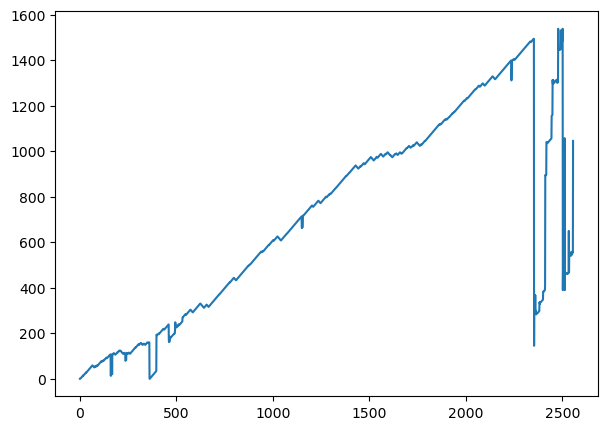

In [33]:

fig, ax = plt.subplots(figsize=(7,5))
df.loc[df["id"] == '001519c8', 'cursor_position'].plot(kind="line", ax=ax)
# ax.set_xlim(0, 550);

In [120]:
df["cursor_position"][:5]

0    0
1    0
2    0
3    1
4    2
Name: cursor_position, dtype: int64

In [122]:
df['cursor_position'].shift(1)[:5]

0    NaN
1    0.0
2    0.0
3    0.0
4    1.0
Name: cursor_position, dtype: float64

In [123]:
# Added to the initial block of groupby_id agg function in grand daddy block

df["revisions"] = (df['cursor_position'] < df['cursor_position'].shift(1)).astype(int)

In [125]:
df.groupby('id')['revisions'].sum()

id
001519c8    454
0022f953    331
0042269b    483
0059420b    160
0075873a    529
           ... 
ffb8c745    972
ffbef7e5     73
ffccd6fd    148
ffec5b38    285
fff05981    477
Name: revisions, Length: 2471, dtype: int64

In [127]:
df['revisions'].isna().sum()

0

In [130]:
df[16:26]

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count,characters,quotations,periods,question_marks,commas,colons,semi_colons,exclamation_points,revisions
16,001519c8,17,109560,109729,169,Input,q,q,q,14,3,1,0,1,0,0,0,0,0,0
17,001519c8,18,109826,109994,168,Input,q,q,q,15,3,1,0,1,0,0,0,0,0,0
18,001519c8,19,110398,110516,118,Remove/Cut,Backspace,Backspace,q,14,3,1,0,1,0,0,0,0,0,1
19,001519c8,20,110595,110751,156,Input,q,q,q,15,3,1,0,1,0,0,0,0,0,0
20,001519c8,21,110745,110863,118,Input,q,q,q,16,3,1,0,1,0,0,0,0,0,0
21,001519c8,22,110848,110989,141,Input,Space,Space,,17,3,0,0,1,0,0,0,0,0,0
22,001519c8,23,111034,111140,106,Input,q,q,q,18,4,1,0,1,0,0,0,0,0,0
23,001519c8,24,111174,111261,87,Input,q,q,q,19,4,1,0,1,0,0,0,0,0,0
24,001519c8,25,111310,111414,104,Input,q,q,q,20,4,1,0,1,0,0,0,0,0,0
25,001519c8,26,111442,111587,145,Input,q,q,q,21,4,1,0,1,0,0,0,0,0,0


<hr style="border: 4px solid blue">

# PAUSES AND PRODUCTION RATE STILL NEED TO BE ENGINEERED

### Pauses

In [131]:
df["activity"].unique()

array(['Nonproduction', 'Input', 'Remove/Cut', 'Replace', 'Movement',
       'Paste'], dtype=object)

In [143]:
df.groupby('id')["action_time"].max().describe()

count      2471.000000
mean       2989.163497
std       13084.145614
min         153.000000
25%         515.000000
50%        1278.000000
75%        2648.500000
max      447470.000000
Name: action_time, dtype: float64

In [160]:
df.groupby('id')["action_time"].sum().describe()

count    2.471000e+03
mean     3.336675e+05
std      1.575202e+05
min      1.345200e+04
25%      2.111480e+05
50%      3.049510e+05
75%      4.248140e+05
max      1.210508e+06
Name: action_time, dtype: float64

In [161]:
1.210508e+06/1000/60

20.175133333333335

In [165]:
df["pause_time"] = 0

In [167]:
df.loc[df["activity"] == "Nonproduction", 'pause_time'] = df.loc[df["activity"] == "Nonproduction", "action_time"]

In [169]:
df.tail()

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,...,characters,quotations,periods,question_marks,commas,colons,semi_colons,exclamation_points,revisions,pause_time
8405893,fff05981,3615,2063944,2064440,496,Nonproduction,Leftclick,Leftclick,NoChange,1031,...,0,0,1,0,0,0,0,0,1,496
8405894,fff05981,3616,2064497,2064497,0,Nonproduction,Shift,Shift,NoChange,1031,...,0,0,1,0,0,0,0,0,0,0
8405895,fff05981,3617,2064657,2064765,108,Replace,q,q,q => q,1031,...,1,0,1,0,0,0,0,0,0,0
8405896,fff05981,3618,2069186,2069259,73,Nonproduction,Leftclick,Leftclick,NoChange,1028,...,0,0,1,0,0,0,0,0,1,73
8405897,fff05981,3619,2070065,2070133,68,Input,.,.,.,1029,...,0,0,1,0,0,0,0,0,0,0


In [170]:
df['pause_time'].isna().sum()

0

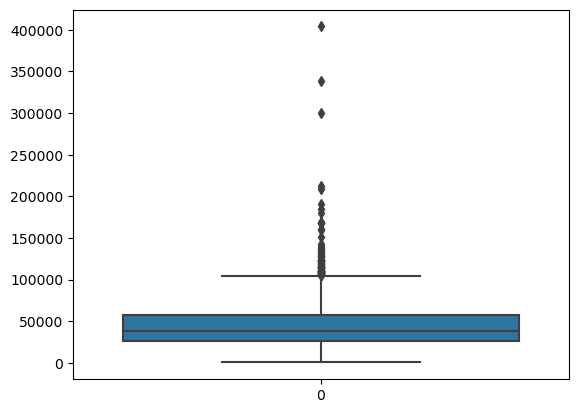

In [154]:
sns.boxplot(data=df.groupby('id')["down_time"].sum()/1000/60);

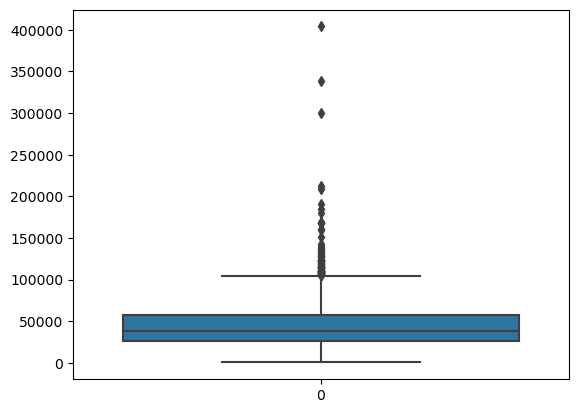

In [155]:
sns.boxplot(data=df.groupby('id')["up_time"].sum()/1000/60);

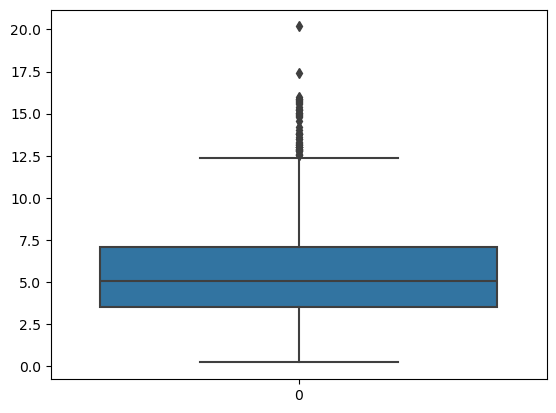

In [156]:
sns.boxplot(data=df.groupby('id')["action_time"].sum()/1000/60);

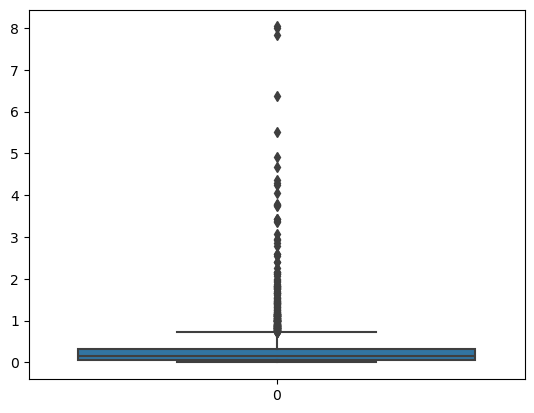

In [171]:
sns.boxplot(data=df.groupby('id')["pause_time"].sum()/1000/60);

<hr style="border: 4px solid blue">

<hr style="border: 4px solid blue">

# Grand Daddy Function amalgamation

In [209]:
# This cell will be used to amalgamate the different preprocessing steps

def preprocess(df):

    # Basing new df on columns aggregated by max
    pivot = df.pivot_table(values=['event_id', 'down_time', 'up_time', 'action_time','cursor_position',
           'word_count'], index='id', aggfunc=['max'])

    # dropping the multi-index "max" from the column
    pivot.columns = pivot.columns.droplevel(level=0)


    # Features based on the contents of the essay itself (characters and punctuation)
    df["characters"] = df['text_change'].str.contains('q').astype(int)
    df["quotations"] = df['text_change'].str.contains('"').astype(int)
    df["periods"] = df['text_change'].str.contains(r"\.\s*$").astype(int)
    df["question_marks"] = df['text_change'].str.contains("\?").astype(int)
    df["commas"] = df['text_change'].str.contains(",").astype(int)
    df["colons"] = df['text_change'].str.contains(":").astype(int)
    df["semi_colons"] = df['text_change'].str.contains(";").astype(int)
    df["exclamation_points"] = df['text_change'].str.contains("!").astype(int)

    # REVISIONS
    df["revisions"] = (df['cursor_position'] < df['cursor_position'].shift(1)).astype(int)

    # Pause Time as best I could
    df["pause_time"] = 0
    df.loc[df["activity"] == "Nonproduction", 'pause_time'] = df.loc[df["activity"] == "Nonproduction", "action_time"]

    # groupby with aggregation for sums of events
    summed_cols = df.groupby('id')[["characters", 'quotations', 'periods', 'question_marks', 'commas', 'colons', 'semi_colons',\
                      'exclamation_points', "revisions", "pause_time"]].agg("sum")


    # Acvtivities
    from sklearn.preprocessing import OneHotEncoder
    ohe = OneHotEncoder(sparse_output=False)
    activities = pd.DataFrame(ohe.fit_transform(df[["activity"]]), columns=ohe.get_feature_names_out())
    activities["id"] = df["id"].copy()
    act_totals = activities.groupby("id").agg('sum')


    # Full Process for Down Events

    ohe_down_event = OneHotEncoder(sparse_output=False)
    down_events = pd.DataFrame(ohe_down_event.fit_transform(df[["down_event"]]), columns=ohe_down_event.get_feature_names_out())
    down_events["id"] = df["id"].copy()
    down_events_totals = down_events.groupby("id").agg("sum")


    # Full Process for Up Events

    ohe_up_event = OneHotEncoder(sparse_output=False)
    up_events = pd.DataFrame(ohe_up_event.fit_transform(df[["up_event"]]), columns=ohe_up_event.get_feature_names_out())
    up_events["id"] = df["id"].copy()
    up_events_totals = up_events.groupby("id").agg("sum")

    up_events_totals

    # Joining all data together
    joined_df = pivot.join([[summed_cols, up_events_totals, down_events_totals, act_totals]])

    # Adding production rate feature
    joined_df["production_rate"] = joined_df["word_count"] / joined_df["action_time"]
    joined_df["words/sentence"] = joined_df["word_count"] / (joined_df["periods"] + joined_df["exclamation_points"] \
                                                            + joined_df["question_marks"])
    
    return joined_df

### Accurately composed df to join with the pivot table

In [173]:
summed_cols = df.groupby('id')[["characters", 'quotations', 'periods', 'question_marks', 'commas', 'colons', 'semi_colons',\
                  'exclamation_points', "revisions", "pause_time"]].agg("sum")
summed_cols

,characters,quotations,periods,question_marks,commas,colons,semi_colons,exclamation_points,revisions,pause_time
id,,,,,,,,,,
001519c8,1949,0,2553,0,14,0,1,0,454,18506
0022f953,1699,6,2447,3,24,0,0,0,331,13781
0042269b,3267,2,4113,0,28,0,0,0,483,33951
0059420b,1148,0,1552,0,3,0,0,0,160,3062
0075873a,1964,0,2519,2,25,0,0,0,529,6988
...,...,...,...,...,...,...,...,...,...,...
ffb8c745,3608,6,4728,0,43,2,0,0,972,5203
ffbef7e5,1921,0,2592,0,24,0,0,0,73,6583
ffccd6fd,1031,0,3045,0,3,0,0,0,148,10232


### Pivot table creation, basis for ultimate df object

In [175]:
# This is the original creation of the grouped df object utilizing the raw aggregated .max() statistics

pivot = df.pivot_table(values=['event_id', 'down_time', 'up_time', 'action_time','cursor_position',
       'word_count'], index='id', aggfunc=['max'])
pivot

max                                                       
         action_time cursor_position down_time event_id  up_time word_count
id                                                                         
001519c8        2259            1539   1801877     2557  1801969        256
0022f953        1758            1676   1788842     2454  1788969        323
0042269b        3005            2291   1771219     4136  1771669        404
0059420b         806            1047   1404394     1556  1404469        206
0075873a         701            1402   1662390     2531  1662472        252
...              ...             ...       ...      ...      ...        ...
ffb8c745        3323            1634   1791581     4739  1791649        461
ffbef7e5        1144            1877   1799124     2604  1799174        438
ffccd6fd         564            2761   1959273     3063  1959363        201
ffec5b38        1388            2133   1508335     3242  1508504        413
fff05981        1915            1496   2070065     3619  2070133        241

[2471 rows x 6 columns]

In [176]:
# This removes "Max" multi-index column label

pivot.columns = pivot.columns.droplevel(level=0)

In [177]:
pivot.describe()

,action_time,cursor_position,down_time,event_id,up_time,word_count
count,2471.000000,2471.000000,2.471000e+03,2471.000000,2.471000e+03,2471.000000
mean,2989.163497,2232.188183,1.769341e+06,3401.820316,1.769537e+06,389.966410
std,13084.145614,969.507385,2.760367e+05,1578.850387,2.760283e+05,172.455317
min,153.000000,207.000000,2.294520e+05,262.000000,2.295480e+05,35.000000
25%,515.000000,1487.500000,1.754688e+06,2193.500000,1.754901e+06,255.000000
50%,1278.000000,1993.000000,1.792237e+06,3082.000000,1.792315e+06,351.000000
75%,2648.500000,2758.500000,1.807522e+06,4301.000000,1.807774e+06,480.000000
max,447470.000000,7802.000000,8.313630e+06,12876.000000,8.313707e+06,1326.000000


In [178]:
# Just an interesting exploration of fact - only these records have an equality

pivot[pivot['action_time'] == (abs(pivot["down_time"] - pivot['up_time']))]

,action_time,cursor_position,down_time,event_id,up_time,word_count
id,,,,,,
0ad15907,691,1681,1776290,1959,1776981,306
0ad30c56,3357,3010,1761927,5622,1765284,554
0fa3f386,2571,1522,1803458,1840,1806029,235
10989e65,1972,2058,1750552,3207,1752524,389
2dc069c3,51518,2756,1751011,3964,1802529,519
315bdafd,5157,876,1205278,1379,1210435,201
4c973b64,6772,3915,1793944,5766,1800716,676
56586ecf,34320,2736,1634575,3168,1668895,485
610914b9,1730,1878,1781749,2445,1783479,318


In [180]:
summed_cols.head()

,characters,quotations,periods,question_marks,commas,colons,semi_colons,exclamation_points,revisions,pause_time
id,,,,,,,,,,
001519c8,1949,0,2553,0,14,0,1,0,454,18506
0022f953,1699,6,2447,3,24,0,0,0,331,13781
0042269b,3267,2,4113,0,28,0,0,0,483,33951
0059420b,1148,0,1552,0,3,0,0,0,160,3062
0075873a,1964,0,2519,2,25,0,0,0,529,6988


In [181]:
pivot.head()

,action_time,cursor_position,down_time,event_id,up_time,word_count
id,,,,,,
001519c8,2259,1539,1801877,2557,1801969,256
0022f953,1758,1676,1788842,2454,1788969,323
0042269b,3005,2291,1771219,4136,1771669,404
0059420b,806,1047,1404394,1556,1404469,206
0075873a,701,1402,1662390,2531,1662472,252


In [182]:
joined_df = pivot.join(summed_cols)

In [185]:
pivot.shape

(2471, 6)

In [186]:
summed_cols.shape

(2471, 10)

In [184]:
joined_df.shape

(2471, 16)

In [190]:
up_events_totals.shape

(2471, 130)

In [191]:
down_events_totals.shape

(2471, 131)

In [192]:
act_totals.shape

(2471, 6)

In [193]:
6+131+130+10+6

283

In [194]:
joined_df = joined_df.join([summed_cols, up_events_totals, down_events_totals, act_totals])
joined_df.head()

,action_time,cursor_position,down_time,event_id,up_time,word_count,characters,quotations,periods,question_marks,...,down_event_Å,down_event_Ë,down_event_â,down_event_ä,activity_Input,activity_Movement,activity_Nonproduction,activity_Paste,activity_Remove/Cut,activity_Replace
id,,,,,,,,,,,,,,,,,,,,,
001519c8,2259,1539,1801877,2557,1801969,256,1949,0,2553,0,...,0.0,0.0,0.0,0.0,2010.0,3.0,120.0,0.0,417.0,7.0
0022f953,1758,1676,1788842,2454,1788969,323,1699,6,2447,3,...,0.0,0.0,0.0,0.0,1938.0,0.0,254.0,1.0,260.0,1.0
0042269b,3005,2291,1771219,4136,1771669,404,3267,2,4113,0,...,0.0,0.0,0.0,0.0,3515.0,0.0,175.0,0.0,439.0,7.0
0059420b,806,1047,1404394,1556,1404469,206,1148,0,1552,0,...,0.0,0.0,0.0,0.0,1304.0,0.0,99.0,1.0,151.0,1.0
0075873a,701,1402,1662390,2531,1662472,252,1964,0,2519,2,...,0.0,0.0,0.0,0.0,1942.0,0.0,72.0,0.0,517.0,0.0


In [195]:
joined_df["production_rate"] = joined_df["word_count"] / joined_df["action_time"]
joined_df['production_rate'].describe()

count    2471.000000
mean        0.408539
std         0.374273
min         0.000986
25%         0.139274
50%         0.299611
75%         0.561629
max         3.188034
Name: production_rate, dtype: float64

In [200]:
joined_df.head()

,action_time,cursor_position,down_time,event_id,up_time,word_count,characters,quotations,periods,question_marks,...,down_event_Ë,down_event_â,down_event_ä,activity_Input,activity_Movement,activity_Nonproduction,activity_Paste,activity_Remove/Cut,activity_Replace,production_rate
id,,,,,,,,,,,,,,,,,,,,,
001519c8,2259,1539,1801877,2557,1801969,256,1949,0,2553,0,...,0.0,0.0,0.0,2010.0,3.0,120.0,0.0,417.0,7.0,0.113324
0022f953,1758,1676,1788842,2454,1788969,323,1699,6,2447,3,...,0.0,0.0,0.0,1938.0,0.0,254.0,1.0,260.0,1.0,0.183732
0042269b,3005,2291,1771219,4136,1771669,404,3267,2,4113,0,...,0.0,0.0,0.0,3515.0,0.0,175.0,0.0,439.0,7.0,0.134443
0059420b,806,1047,1404394,1556,1404469,206,1148,0,1552,0,...,0.0,0.0,0.0,1304.0,0.0,99.0,1.0,151.0,1.0,0.255583
0075873a,701,1402,1662390,2531,1662472,252,1964,0,2519,2,...,0.0,0.0,0.0,1942.0,0.0,72.0,0.0,517.0,0.0,0.359486


In [201]:
joined_df['periods'] = period_replacement

In [202]:
joined_df.head()

,action_time,cursor_position,down_time,event_id,up_time,word_count,characters,quotations,periods,question_marks,...,down_event_Ë,down_event_â,down_event_ä,activity_Input,activity_Movement,activity_Nonproduction,activity_Paste,activity_Remove/Cut,activity_Replace,production_rate
id,,,,,,,,,,,,,,,,,,,,,
001519c8,2259,1539,1801877,2557,1801969,256,1949,0,28,0,...,0.0,0.0,0.0,2010.0,3.0,120.0,0.0,417.0,7.0,0.113324
0022f953,1758,1676,1788842,2454,1788969,323,1699,6,18,3,...,0.0,0.0,0.0,1938.0,0.0,254.0,1.0,260.0,1.0,0.183732
0042269b,3005,2291,1771219,4136,1771669,404,3267,2,23,0,...,0.0,0.0,0.0,3515.0,0.0,175.0,0.0,439.0,7.0,0.134443
0059420b,806,1047,1404394,1556,1404469,206,1148,0,13,0,...,0.0,0.0,0.0,1304.0,0.0,99.0,1.0,151.0,1.0,0.255583
0075873a,701,1402,1662390,2531,1662472,252,1964,0,32,2,...,0.0,0.0,0.0,1942.0,0.0,72.0,0.0,517.0,0.0,0.359486


In [203]:
joined_df["words/sentence"] = joined_df["word_count"] / (joined_df["periods"] + joined_df["exclamation_points"] \
                                                            + joined_df["question_marks"])

In [204]:
joined_df.head()

,action_time,cursor_position,down_time,event_id,up_time,word_count,characters,quotations,periods,question_marks,...,down_event_â,down_event_ä,activity_Input,activity_Movement,activity_Nonproduction,activity_Paste,activity_Remove/Cut,activity_Replace,production_rate,words/sentence
id,,,,,,,,,,,,,,,,,,,,,
001519c8,2259,1539,1801877,2557,1801969,256,1949,0,28,0,...,0.0,0.0,2010.0,3.0,120.0,0.0,417.0,7.0,0.113324,9.142857
0022f953,1758,1676,1788842,2454,1788969,323,1699,6,18,3,...,0.0,0.0,1938.0,0.0,254.0,1.0,260.0,1.0,0.183732,15.380952
0042269b,3005,2291,1771219,4136,1771669,404,3267,2,23,0,...,0.0,0.0,3515.0,0.0,175.0,0.0,439.0,7.0,0.134443,17.565217
0059420b,806,1047,1404394,1556,1404469,206,1148,0,13,0,...,0.0,0.0,1304.0,0.0,99.0,1.0,151.0,1.0,0.255583,15.846154
0075873a,701,1402,1662390,2531,1662472,252,1964,0,32,2,...,0.0,0.0,1942.0,0.0,72.0,0.0,517.0,0.0,0.359486,7.411765


# Testing the preprocess function

In [207]:
df.columns

Index(['id', 'event_id', 'down_time', 'up_time', 'action_time', 'activity',
       'down_event', 'up_event', 'text_change', 'cursor_position',
       'word_count', 'characters', 'quotations', 'periods', 'question_marks',
       'commas', 'colons', 'semi_colons', 'exclamation_points', 'revisions',
       'pause_time'],
      dtype='object')

In [208]:
df["id"].isnull().any()

False

In [211]:
# This cell will be used to amalgamate the different preprocessing steps

def preprocess(df):

    # Basing new df on columns aggregated by max
    pivot = df.pivot_table(values=['event_id', 'down_time', 'up_time', 'action_time','cursor_position',
           'word_count'], index='id', aggfunc=['max'])

    # dropping the multi-index "max" from the column
    pivot.columns = pivot.columns.droplevel(level=0)


    # Features based on the contents of the essay itself (characters and punctuation)
    df["characters"] = df['text_change'].str.contains('q').astype(int)
    df["quotations"] = df['text_change'].str.contains('"').astype(int)
    df["periods"] = df['text_change'].str.contains(r"\.\s*$").astype(int)
    df["question_marks"] = df['text_change'].str.contains("\?").astype(int)
    df["commas"] = df['text_change'].str.contains(",").astype(int)
    df["colons"] = df['text_change'].str.contains(":").astype(int)
    df["semi_colons"] = df['text_change'].str.contains(";").astype(int)
    df["exclamation_points"] = df['text_change'].str.contains("!").astype(int)

    # REVISIONS
    df["revisions"] = (df['cursor_position'] < df['cursor_position'].shift(1)).astype(int)

    # Pause Time as best I could
    df["pause_time"] = 0
    df.loc[df["activity"] == "Nonproduction", 'pause_time'] = df.loc[df["activity"] == "Nonproduction", "action_time"]

    # groupby with aggregation for sums of events
    summed_cols = df.groupby('id')[["characters", 'quotations', 'periods', 'question_marks', 'commas', 'colons', 'semi_colons',\
                      'exclamation_points', "revisions", "pause_time"]].agg("sum")


    # Acvtivities
    from sklearn.preprocessing import OneHotEncoder
    ohe = OneHotEncoder(sparse_output=False)
    activities = pd.DataFrame(ohe.fit_transform(df[["activity"]]), columns=ohe.get_feature_names_out())
    activities["id"] = df["id"].copy()
    act_totals = activities.groupby("id").agg('sum')


    # Full Process for Down Events

    ohe_down_event = OneHotEncoder(sparse_output=False)
    down_events = pd.DataFrame(ohe_down_event.fit_transform(df[["down_event"]]), columns=ohe_down_event.get_feature_names_out())
    down_events["id"] = df["id"].copy()
    down_events_totals = down_events.groupby("id").agg("sum")


    # Full Process for Up Events

    ohe_up_event = OneHotEncoder(sparse_output=False)
    up_events = pd.DataFrame(ohe_up_event.fit_transform(df[["up_event"]]), columns=ohe_up_event.get_feature_names_out())
    up_events["id"] = df["id"].copy()
    up_events_totals = up_events.groupby("id").agg("sum")

    up_events_totals

    # Joining all data together
    joined_df = pd.concat([pivot, summed_cols, up_events_totals, down_events_totals, act_totals], axis=1)

    # Adding production rate feature
    joined_df["production_rate"] = joined_df["word_count"] / joined_df["action_time"]
    joined_df["words/sentence"] = joined_df["word_count"] / (joined_df["periods"] + joined_df["exclamation_points"] \
                                                            + joined_df["question_marks"])
    
    return joined_df

In [212]:
trial = preprocess(df=df)

In [219]:
(trial != joined_df).sum().sum()

0

In [214]:
joined_df.head()

,action_time,cursor_position,down_time,event_id,up_time,word_count,characters,quotations,periods,question_marks,...,down_event_â,down_event_ä,activity_Input,activity_Movement,activity_Nonproduction,activity_Paste,activity_Remove/Cut,activity_Replace,production_rate,words/sentence
id,,,,,,,,,,,,,,,,,,,,,
001519c8,2259,1539,1801877,2557,1801969,256,1949,0,28,0,...,0.0,0.0,2010.0,3.0,120.0,0.0,417.0,7.0,0.113324,9.142857
0022f953,1758,1676,1788842,2454,1788969,323,1699,6,18,3,...,0.0,0.0,1938.0,0.0,254.0,1.0,260.0,1.0,0.183732,15.380952
0042269b,3005,2291,1771219,4136,1771669,404,3267,2,23,0,...,0.0,0.0,3515.0,0.0,175.0,0.0,439.0,7.0,0.134443,17.565217
0059420b,806,1047,1404394,1556,1404469,206,1148,0,13,0,...,0.0,0.0,1304.0,0.0,99.0,1.0,151.0,1.0,0.255583,15.846154
0075873a,701,1402,1662390,2531,1662472,252,1964,0,32,2,...,0.0,0.0,1942.0,0.0,72.0,0.0,517.0,0.0,0.359486,7.411765


In [221]:
trial.shape == joined_df.shape

True

# Production Rate ("DONE")
### I will calculate the production rate as a product of Words/Action Time once the final df has been combined.

<hr style="border: 4px solid GOLD">

# CHECK! (DONE)

# To-Dos:
- cursor position - how do we make this meaningful?
- 'down_event', 'up_event', 'text_change' - create counts of the different dummies/OHE values

<hr style="border: 4px solid GOLD">

# Modeling
### Now that I have concluded the preprocessing of the data and engineered features, I will begin the process of modeling the data. All of the data has been converted to numeric features, so the train-test split and modeling preparation should be pretty straight forward, the only steps required will be scaling the data using the training data to fit on it.

In [226]:
# verifying the data types present in my modeling data
trial.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [229]:
grades['score']

,id,score
0,001519c8,3.5
1,0022f953,3.5
2,0042269b,6.0
3,0059420b,2.0
4,0075873a,4.0
...,...,...
2466,ffb8c745,3.5
2467,ffbef7e5,4.0
2468,ffccd6fd,1.5
2469,ffec5b38,5.0


### Train test split

In [230]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trial, grades["score"], random_state=1313)

In [282]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


pipe = Pipeline(steps=[
    ("mms", MinMaxScaler()),
    ("etr", XGBRegressor())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('mms', MinMaxScaler()),
                ('etr',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [272]:
models = pd.DataFrame(columns=["Name", "Train R2", "Train RMSE", "Test R2", "Test RMSE"])
def log_models(model, name):
    train_r_squared = model.score(X_train, y_train)
    test_r_squared = model.score(X_test, y_test)
    train_rmse = -(cross_val_score(pipe, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5, n_jobs=4).mean())
    test_rmse = mean_squared_error(y_test, model.predict(X_test), squared=False)
    
    models.loc[len(models)] = [name, train_r_squared, train_rmse, test_r_squared, test_rmse]
    return models

### Model DataFrame

In [283]:
# Collection of models here

# log_models(pipe, "Extra Trees Regressor")
# log_models(pipe, "Random Forest Regressor")

### HOLY COW linear regression did poorly
# log_models(pipe, "Linear Regression")

# log_models(pipe, "KNN Regressor")
log_models(pipe, "XGB Reg")

/Users/samalainabayeva/anaconda3/envs/david_env/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/samalainabayeva/anaconda3/envs/david_env/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/samalainabayeva/anaconda3/envs/david_env/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/samalainabayeva/anaconda3/envs/david_env/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dat

,Name,Train R2,Train RMSE,Test R2,Test RMSE
0,Extra Trees Regressor,1.000000,6.651442e-01,5.677437e-01,6.614927e-01
1,Random Forest Regressor,0.943515,6.584558e-01,5.772917e-01,6.541462e-01
2,Linear Regression,0.555487,9.196140e+10,-7.309664e+22,2.720214e+11
3,KNN Regressor,0.650689,7.578922e-01,4.257360e-01,7.624479e-01
4,XGB Reg,0.992303,7.004922e-01,5.080179e-01,7.057145e-01


In [284]:
models.sort_values(by=["Test RMSE", "Train RMSE"], ascending=True)

,Name,Train R2,Train RMSE,Test R2,Test RMSE
1,Random Forest Regressor,0.943515,6.584558e-01,5.772917e-01,6.541462e-01
0,Extra Trees Regressor,1.000000,6.651442e-01,5.677437e-01,6.614927e-01
4,XGB Reg,0.992303,7.004922e-01,5.080179e-01,7.057145e-01
3,KNN Regressor,0.650689,7.578922e-01,4.257360e-01,7.624479e-01
2,Linear Regression,0.555487,9.196140e+10,-7.309664e+22,2.720214e+11


### Random Forest Reg seems to be the best performer, will attempt to prune to avoid overfitting

In [341]:
pipe = Pipeline(steps=[
    ("mms", MinMaxScaler()),
    ("etr", RandomForestRegressor(n_estimators=100, n_jobs=4, max_depth=15, max_features='sqrt', max_samples=.8)) # "sqrt"
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('mms', MinMaxScaler()),
                ('etr',
                 RandomForestRegressor(max_depth=15, max_features='sqrt',
                                       max_samples=0.8, n_jobs=4))])

In [336]:
log_models(pipe, "Pruned RFR,75 Est, 15 Max Depth, sqrt, MAX SAMP .75")

,Name,Train R2,Train RMSE,Test R2,Test RMSE
0,Extra Trees Regressor,1.000000,6.651442e-01,5.677437e-01,6.614927e-01
1,Random Forest Regressor,0.943515,6.584558e-01,5.772917e-01,6.541462e-01
2,Linear Regression,0.555487,9.196140e+10,-7.309664e+22,2.720214e+11
3,KNN Regressor,0.650689,7.578922e-01,4.257360e-01,7.624479e-01
4,XGB Reg,0.992303,7.004922e-01,5.080179e-01,7.057145e-01
5,Pruned RFR,0.767154,6.732411e-01,5.584500e-01,6.685661e-01
6,"Pruned RFR, 15 Max Depth",0.887142,6.638924e-01,5.658769e-01,6.629195e-01
7,"Pruned RFR, 15 Max Depth, SQRT",0.915424,6.601672e-01,5.734224e-01,6.571332e-01
8,"Pruned RFR, 15 Max Depth, SQRT, MAX SAMP .9",0.908559,6.584968e-01,5.814756e-01,6.509007e-01
9,"Pruned RFR, 15 Max Depth, SQRT, MAX SAMP .8",0.894498,6.602073e-01,5.842261e-01,6.487584e-01


In [337]:
models.sort_values(by="Test RMSE")

,Name,Train R2,Train RMSE,Test R2,Test RMSE
9,"Pruned RFR, 15 Max Depth, SQRT, MAX SAMP .8",0.894498,6.602073e-01,5.842261e-01,6.487584e-01
10,"Pruned RFR, 15 Max Depth, SQRT, MAX SAMP .7",0.879001,6.610630e-01,5.823744e-01,6.502015e-01
20,"Pruned RFR,75 Est, 15 Max Depth, sqrt, MAX SAM...",0.897008,6.593617e-01,5.819898e-01,6.505008e-01
8,"Pruned RFR, 15 Max Depth, SQRT, MAX SAMP .9",0.908559,6.584968e-01,5.814756e-01,6.509007e-01
15,"Pruned RFR, 17 Max Depth, log2, MAX SAMP .75",0.896875,6.570586e-01,5.795256e-01,6.524154e-01
13,"Pruned RFR, 13 Max Depth, log2, MAX SAMP .75",0.866727,6.601141e-01,5.782477e-01,6.534060e-01
14,"Pruned RFR, 20 Max Depth, log2, MAX SAMP .75",0.903228,6.602710e-01,5.780363e-01,6.535697e-01
1,Random Forest Regressor,0.943515,6.584558e-01,5.772917e-01,6.541462e-01
16,"Pruned RFR, 16 Max Depth, sqrt, MAX SAMP .75",0.892177,6.632360e-01,5.769561e-01,6.544058e-01
18,"Pruned RFR,50 Est, 16 Max Depth, sqrt, MAX SAM...",0.896995,6.624462e-01,5.760627e-01,6.550964e-01


In [331]:
from sklearn.model_selection import GridSearchCV

In [334]:
[i for i in pipe.get_params().keys()]

['memory',
 'steps',
 'verbose',
 'mms',
 'etr',
 'mms__clip',
 'mms__copy',
 'mms__feature_range',
 'etr__bootstrap',
 'etr__ccp_alpha',
 'etr__criterion',
 'etr__max_depth',
 'etr__max_features',
 'etr__max_leaf_nodes',
 'etr__max_samples',
 'etr__min_impurity_decrease',
 'etr__min_samples_leaf',
 'etr__min_samples_split',
 'etr__min_weight_fraction_leaf',
 'etr__n_estimators',
 'etr__n_jobs',
 'etr__oob_score',
 'etr__random_state',
 'etr__verbose',
 'etr__warm_start']

In [338]:
np.sqrt(X_train.shape[1])

16.881943016134134

In [339]:
16/X_train.shape[1]

0.056140350877192984

# Grid Search CV

In [340]:
params = {'etr__ccp_alpha': [0, 0.01, 0.1],
         'etr__max_depth':[14, 15, 16],
         'etr__max_samples': [.8, .78, .82],
         'etr__max_features': ["sqrt", .1, .2],
         'etr__min_samples_split': [2, 3, 4]}

In [342]:
grid = GridSearchCV(pipe, params, scoring="neg_root_mean_squared_error", n_jobs=6, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('mms', MinMaxScaler()),
                                       ('etr',
                                        RandomForestRegressor(max_depth=15,
                                                              max_features='sqrt',
                                                              max_samples=0.8,
                                                              n_jobs=4))]),
             n_jobs=6,
             param_grid={'etr__ccp_alpha': [0, 0.01, 0.1],
                         'etr__max_depth': [14, 15, 16],
                         'etr__max_features': ['sqrt', 0.1, 0.2],
                         'etr__max_samples': [0.8, 0.78, 0.82],
                         'etr__min_samples_split': [2, 3, 4]},
             scoring='neg_root_mean_squared_error')

In [343]:
grid.best_estimator_

Pipeline(steps=[('mms', MinMaxScaler()),
                ('etr',
                 RandomForestRegressor(ccp_alpha=0, max_depth=15,
                                       max_features=0.2, max_samples=0.82,
                                       min_samples_split=4, n_jobs=4))])

In [344]:
grid.best_params_

{'etr__ccp_alpha': 0,
 'etr__max_depth': 15,
 'etr__max_features': 0.2,
 'etr__max_samples': 0.82,
 'etr__min_samples_split': 4}

In [345]:
log_models(grid.best_estimator_, "Grid Searched Model of RFR")

,Name,Train R2,Train RMSE,Test R2,Test RMSE
0,Extra Trees Regressor,1.000000,6.651442e-01,5.677437e-01,6.614927e-01
1,Random Forest Regressor,0.943515,6.584558e-01,5.772917e-01,6.541462e-01
2,Linear Regression,0.555487,9.196140e+10,-7.309664e+22,2.720214e+11
3,KNN Regressor,0.650689,7.578922e-01,4.257360e-01,7.624479e-01
4,XGB Reg,0.992303,7.004922e-01,5.080179e-01,7.057145e-01
5,Pruned RFR,0.767154,6.732411e-01,5.584500e-01,6.685661e-01
6,"Pruned RFR, 15 Max Depth",0.887142,6.638924e-01,5.658769e-01,6.629195e-01
7,"Pruned RFR, 15 Max Depth, SQRT",0.915424,6.601672e-01,5.734224e-01,6.571332e-01
8,"Pruned RFR, 15 Max Depth, SQRT, MAX SAMP .9",0.908559,6.584968e-01,5.814756e-01,6.509007e-01
9,"Pruned RFR, 15 Max Depth, SQRT, MAX SAMP .8",0.894498,6.602073e-01,5.842261e-01,6.487584e-01


In [346]:
models.sort_values(by="Test RMSE")

,Name,Train R2,Train RMSE,Test R2,Test RMSE
9,"Pruned RFR, 15 Max Depth, SQRT, MAX SAMP .8",0.894498,6.602073e-01,5.842261e-01,6.487584e-01
10,"Pruned RFR, 15 Max Depth, SQRT, MAX SAMP .7",0.879001,6.610630e-01,5.823744e-01,6.502015e-01
20,"Pruned RFR,75 Est, 15 Max Depth, sqrt, MAX SAM...",0.897008,6.593617e-01,5.819898e-01,6.505008e-01
8,"Pruned RFR, 15 Max Depth, SQRT, MAX SAMP .9",0.908559,6.584968e-01,5.814756e-01,6.509007e-01
15,"Pruned RFR, 17 Max Depth, log2, MAX SAMP .75",0.896875,6.570586e-01,5.795256e-01,6.524154e-01
13,"Pruned RFR, 13 Max Depth, log2, MAX SAMP .75",0.866727,6.601141e-01,5.782477e-01,6.534060e-01
14,"Pruned RFR, 20 Max Depth, log2, MAX SAMP .75",0.903228,6.602710e-01,5.780363e-01,6.535697e-01
21,Grid Searched Model of RFR,0.896641,6.605009e-01,5.773811e-01,6.540770e-01
1,Random Forest Regressor,0.943515,6.584558e-01,5.772917e-01,6.541462e-01
16,"Pruned RFR, 16 Max Depth, sqrt, MAX SAMP .75",0.892177,6.632360e-01,5.769561e-01,6.544058e-01


### Another occassion where the gridsearched model performs worse than the normally found model. 

<hr style="border: 4px solid black">

# Training the model on all the data and generating submissions

In [347]:
trial

,action_time,cursor_position,down_time,event_id,up_time,word_count,characters,quotations,periods,question_marks,...,down_event_â,down_event_ä,activity_Input,activity_Movement,activity_Nonproduction,activity_Paste,activity_Remove/Cut,activity_Replace,production_rate,words/sentence
id,,,,,,,,,,,,,,,,,,,,,
001519c8,2259,1539,1801877,2557,1801969,256,1949,0,28,0,...,0.0,0.0,2010.0,3.0,120.0,0.0,417.0,7.0,0.113324,9.142857
0022f953,1758,1676,1788842,2454,1788969,323,1699,6,18,3,...,0.0,0.0,1938.0,0.0,254.0,1.0,260.0,1.0,0.183732,15.380952
0042269b,3005,2291,1771219,4136,1771669,404,3267,2,23,0,...,0.0,0.0,3515.0,0.0,175.0,0.0,439.0,7.0,0.134443,17.565217
0059420b,806,1047,1404394,1556,1404469,206,1148,0,13,0,...,0.0,0.0,1304.0,0.0,99.0,1.0,151.0,1.0,0.255583,15.846154
0075873a,701,1402,1662390,2531,1662472,252,1964,0,32,2,...,0.0,0.0,1942.0,0.0,72.0,0.0,517.0,0.0,0.359486,7.411765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb8c745,3323,1634,1791581,4739,1791649,461,3608,6,59,0,...,0.0,0.0,3588.0,0.0,189.0,0.0,960.0,2.0,0.138730,7.813559
ffbef7e5,1144,1877,1799124,2604,1799174,438,1921,0,33,0,...,0.0,0.0,2395.0,0.0,148.0,0.0,60.0,1.0,0.382867,13.272727
ffccd6fd,564,2761,1959273,3063,1959363,201,1031,0,6,0,...,0.0,0.0,2849.0,0.0,126.0,0.0,88.0,0.0,0.356383,33.500000


In [351]:
(grades["id"] != trial.index).sum()

0

In [352]:
grades["score"]

0       3.5
1       3.5
2       6.0
3       2.0
4       4.0
       ... 
2466    3.5
2467    4.0
2468    1.5
2469    5.0
2470    4.0
Name: score, Length: 2471, dtype: float64

In [353]:
pipe = Pipeline(steps=[
    ("mms", MinMaxScaler()),
    ("etr", RandomForestRegressor(n_estimators=100, n_jobs=4, max_depth=15, max_features='sqrt', max_samples=.8)) # "sqrt"
])

pipe.fit(trial, grades["score"])

Pipeline(steps=[('mms', MinMaxScaler()),
                ('etr',
                 RandomForestRegressor(max_depth=15, max_features='sqrt',
                                       max_samples=0.8, n_jobs=4))])

In [354]:
log_models(pipe, "FULL DATA TRAINING")

,Name,Train R2,Train RMSE,Test R2,Test RMSE
0,Extra Trees Regressor,1.000000,6.651442e-01,5.677437e-01,6.614927e-01
1,Random Forest Regressor,0.943515,6.584558e-01,5.772917e-01,6.541462e-01
2,Linear Regression,0.555487,9.196140e+10,-7.309664e+22,2.720214e+11
3,KNN Regressor,0.650689,7.578922e-01,4.257360e-01,7.624479e-01
4,XGB Reg,0.992303,7.004922e-01,5.080179e-01,7.057145e-01
5,Pruned RFR,0.767154,6.732411e-01,5.584500e-01,6.685661e-01
6,"Pruned RFR, 15 Max Depth",0.887142,6.638924e-01,5.658769e-01,6.629195e-01
7,"Pruned RFR, 15 Max Depth, SQRT",0.915424,6.601672e-01,5.734224e-01,6.571332e-01
8,"Pruned RFR, 15 Max Depth, SQRT, MAX SAMP .9",0.908559,6.584968e-01,5.814756e-01,6.509007e-01
9,"Pruned RFR, 15 Max Depth, SQRT, MAX SAMP .8",0.894498,6.602073e-01,5.842261e-01,6.487584e-01


In [355]:
models.sort_values(by="Test RMSE")

,Name,Train R2,Train RMSE,Test R2,Test RMSE
22,FULL DATA TRAINING,0.888678,6.573183e-01,8.795955e-01,3.491208e-01
9,"Pruned RFR, 15 Max Depth, SQRT, MAX SAMP .8",0.894498,6.602073e-01,5.842261e-01,6.487584e-01
10,"Pruned RFR, 15 Max Depth, SQRT, MAX SAMP .7",0.879001,6.610630e-01,5.823744e-01,6.502015e-01
20,"Pruned RFR,75 Est, 15 Max Depth, sqrt, MAX SAM...",0.897008,6.593617e-01,5.819898e-01,6.505008e-01
8,"Pruned RFR, 15 Max Depth, SQRT, MAX SAMP .9",0.908559,6.584968e-01,5.814756e-01,6.509007e-01
15,"Pruned RFR, 17 Max Depth, log2, MAX SAMP .75",0.896875,6.570586e-01,5.795256e-01,6.524154e-01
13,"Pruned RFR, 13 Max Depth, log2, MAX SAMP .75",0.866727,6.601141e-01,5.782477e-01,6.534060e-01
14,"Pruned RFR, 20 Max Depth, log2, MAX SAMP .75",0.903228,6.602710e-01,5.780363e-01,6.535697e-01
21,Grid Searched Model of RFR,0.896641,6.605009e-01,5.773811e-01,6.540770e-01
1,Random Forest Regressor,0.943515,6.584558e-01,5.772917e-01,6.541462e-01


### Test data

In [356]:
submission_df = pd.read_csv('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/writing_quality/linking-writing-processes-to-writing-quality/test_logs.csv')

In [357]:
submission_df

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,0000aaaa,1,338433,338518,85,Input,Space,Space,,0,0
1,0000aaaa,2,760073,760160,87,Input,Space,Space,,1,0
2,2222bbbb,1,711956,712023,67,Input,q,q,q,0,1
3,2222bbbb,2,290502,290548,46,Input,q,q,q,1,1
4,4444cccc,1,635547,635641,94,Input,Space,Space,,0,0
5,4444cccc,2,184996,185052,56,Input,q,q,q,1,1


In [361]:
sub_processed_df = preprocess(submission_df)

In [362]:
sub_processed_df

,action_time,cursor_position,down_time,event_id,up_time,word_count,characters,quotations,periods,question_marks,...,exclamation_points,revisions,pause_time,up_event_Space,up_event_q,down_event_Space,down_event_q,activity_Input,production_rate,words/sentence
id,,,,,,,,,,,,,,,,,,,,,
0000aaaa,87,1,760073,2,760160,0,0,0,0,0,...,0,0,0,2.0,0.0,2.0,0.0,2.0,0.000000,NaN
2222bbbb,67,1,711956,2,712023,1,2,0,0,0,...,0,1,0,0.0,2.0,0.0,2.0,2.0,0.014925,inf
4444cccc,94,1,635547,2,635641,1,1,0,0,0,...,0,1,0,1.0,1.0,1.0,1.0,2.0,0.010638,inf


In [363]:
trial.shape

(2471, 285)

In [211]:
# This cell will be used to amalgamate the different preprocessing steps

def preprocess(df):

    # Basing new df on columns aggregated by max
    pivot = df.pivot_table(values=['event_id', 'down_time', 'up_time', 'action_time','cursor_position',
           'word_count'], index='id', aggfunc=['max'])

    # dropping the multi-index "max" from the column
    pivot.columns = pivot.columns.droplevel(level=0)


    # Features based on the contents of the essay itself (characters and punctuation)
    df["characters"] = df['text_change'].str.contains('q').astype(int)
    df["quotations"] = df['text_change'].str.contains('"').astype(int)
    df["periods"] = df['text_change'].str.contains(r"\.\s*$").astype(int)
    df["question_marks"] = df['text_change'].str.contains("\?").astype(int)
    df["commas"] = df['text_change'].str.contains(",").astype(int)
    df["colons"] = df['text_change'].str.contains(":").astype(int)
    df["semi_colons"] = df['text_change'].str.contains(";").astype(int)
    df["exclamation_points"] = df['text_change'].str.contains("!").astype(int)

    # REVISIONS
    df["revisions"] = (df['cursor_position'] < df['cursor_position'].shift(1)).astype(int)

    # Pause Time as best I could
    df["pause_time"] = 0
    df.loc[df["activity"] == "Nonproduction", 'pause_time'] = df.loc[df["activity"] == "Nonproduction", "action_time"]

    # groupby with aggregation for sums of events
    summed_cols = df.groupby('id')[["characters", 'quotations', 'periods', 'question_marks', 'commas', 'colons', 'semi_colons',\
                      'exclamation_points', "revisions", "pause_time"]].agg("sum")


    # Acvtivities
    from sklearn.preprocessing import OneHotEncoder
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    activities = pd.DataFrame(ohe.fit_transform(df[["activity"]]), columns=ohe.get_feature_names_out())
    activities["id"] = df["id"].copy()
    act_totals = activities.groupby("id").agg('sum')


    # Full Process for Down Events

    ohe_down_event = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    down_events = pd.DataFrame(ohe_down_event.fit_transform(df[["down_event"]]), columns=ohe_down_event.get_feature_names_out())
    down_events["id"] = df["id"].copy()
    down_events_totals = down_events.groupby("id").agg("sum")


    # Full Process for Up Events

    ohe_up_event = OneHotEncoder(sparse_output=False)
    up_events = pd.DataFrame(ohe_up_event.fit_transform(df[["up_event"]]), columns=ohe_up_event.get_feature_names_out())
    up_events["id"] = df["id"].copy()
    up_events_totals = up_events.groupby("id").agg("sum")

    up_events_totals

    # Joining all data together
    joined_df = pd.concat([pivot, summed_cols, up_events_totals, down_events_totals, act_totals], axis=1)

    # Adding production rate feature
    joined_df["production_rate"] = joined_df["word_count"] / joined_df["action_time"]
    joined_df["words/sentence"] = joined_df["word_count"] / (joined_df["periods"] + joined_df["exclamation_points"] \
                                                            + joined_df["question_marks"])
    
    return joined_df

In [364]:
pipe.predict(sub_processed_df)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- activity_Movement
- activity_Nonproduction
- activity_Paste
- activity_Remove/Cut
- activity_Replace
- ...


In [365]:
trial.shape

(2471, 285)

In [366]:
from sklearn.impute import SimpleImputer

In [ ]:
si = SimpleImputer()